# Practice with Joins

Use pandas SQL (pandasql and pysqldf) or join function for this practice exercises.

Run the cells below to create the following dataframes.

df_purchases contains information on various customer purchases.

In [5]:
# !pip install pandasql

import pandas as pd
from pandasql import sqldf

names = ["Jake", "Joe", "Ellen", "Joe", "Ellen"]
item = ["Ball", "Shirt", "Shoes", "Ball", "Shirt"]

df_purchases = pd.DataFrame({"Name": names, "Item_Purchased": item} )
                    
df_purchases

,Name,Item_Purchased
0,Jake,Ball
1,Joe,Shirt
2,Ellen,Shoes
3,Joe,Ball
4,Ellen,Shirt


df_items contains information on the prices of each item.

In [6]:
item = ["Ball", "Shirt", "Shoes"]
price = [10,15,75]

df_items = pd.DataFrame({"Item": item, "Price":price})

df_items

,Item,Price
0,Ball,10
1,Shirt,15
2,Shoes,75


df_customer contained information on the customers 

In [16]:
customers = ["Jake", "Joe", "Ellen"]
allowance = [15, 12, 85]

df_customers = pd.DataFrame({"Allowance":allowance, "Customers":customers})

df_customers

,Allowance,Customers
0,15,Jake
1,12,Joe
2,85,Ellen


**Question 1:** Write a query that selects all purchases made from the customer stored in the variable customer name

In [14]:

customer_name = ["Jake", "Joe", "Ellen", "Joe", "Ellen"]  
names_tuple = tuple(customer_names)
query = f"SELECT * FROM df_purchases WHERE Name IN {names_tuple};"
purchases_of_customer = sqldf(query, globals())
purchases_of_customer

,Name,Item_Purchased
0,Jake,Ball
1,Joe,Shirt
2,Ellen,Shoes
3,Joe,Ball
4,Ellen,Shirt


**Question 2:** Write a query that selects all items priced above threshold_price.

In [15]:
#Write your code here
threshold_price = 10  
query = f"SELECT * FROM df_items WHERE Price > {threshold_price};"
items_above_threshold = sqldf(query, globals())
print(items_above_threshold)

    Item  Price
0  Shirt     15
1  Shoes     75


**Question 3:** How many customers went over their allowance?

Create df_1, which is df_purchases with an additional column that gives the price of each item

In [17]:
#Write your code here
df_1 = pd.merge(df_purchases, df_items, left_on='Item_Purchased', right_on='Item')
df_1.drop('Item', axis=1, inplace=True)
df_1

,Name,Item_Purchased,Price
0,Jake,Ball,10
1,Joe,Ball,10
2,Joe,Shirt,15
3,Ellen,Shirt,15
4,Ellen,Shoes,75


Create df_2, which stores the total amount that each person spent.

In [18]:
#Write your code here
df_2 =  df_1.groupby("Name").agg({"Price":"sum"})
df_2

,Price
Name,
Ellen,90
Jake,10
Joe,25


Created df_3, which adds each person't allowance to df_2

In [19]:
#Write your code here
df_3 = pd.merge(df_2, df_customers, left_index=True, right_on='Customers').reset_index()
df_3

,index,Price,Allowance,Customers
0,2,90,85,Ellen
1,0,10,15,Jake
2,1,25,12,Joe


Add a column to df_3 which tells whether or not they went over their allowance or not.

In [20]:
#Write your code here
df_3["Over_Allowance"] = df_3["Allowance"] - df_3["Price"] < 0
df_3

,index,Price,Allowance,Customers,Over_Allowance
0,2,90,85,Ellen,True
1,0,10,15,Jake,False
2,1,25,12,Joe,True


Compute how many people went over.

In [21]:
sum(df_3["Over_Allowance"])

2

# Scoot Data Set

Use SQL (pandasql and pysqldf) to create a data frame df_travel that has three columns: trip_time, trip_dist, avg_speed (= trip_dist/trip_time).

Import all necessary packages and read in the scoot data frame below.

In [23]:
#Write your code here
df = pd.read_csv("data/Scoot_Data/Ride_Customer_Info.csv")

In [33]:
#Write your code here
df['avg_speed'] = df['trip_dist'] / df['trip_time']
df_travel = df[['trip_time', 'trip_dist', 'avg_speed']]
df_travel
# df.loc[:,["trip_time", "trip_dist"]]
df

,ride_id,trip_time,trip_dist,plan_id,hr_start,dow,time_slot,batt_perc,dist_h,price,start_location_id,lat,lng,end_location_id,lat.1,lng.1,avg_speed
0,211870,11.336693,3.0,Pro,0,1,0,0.361143,0.287168,2.0,104,37.794700,-122.410960,56,37.771578,-122.442181,0.264627
1,211871,36.616880,2.0,Pro,0,1,0,0.979784,0.080456,4.0,21,37.775606,-122.416976,42,37.749810,-122.431790,0.054620
2,211885,17.900736,3.6,Go,4,1,0,0.500000,0.019225,3.0,90,37.784174,-122.480460,9,37.791758,-122.404929,0.201109
3,211890,15.330679,3.2,Other,5,1,1,0.897714,0.119214,3.0,97,37.804907,-122.441988,26,37.791638,-122.391761,0.208732
4,211894,138.113334,5.3,Other,6,1,1,0.848000,0.030645,8.0,55,37.777440,-122.464940,87,37.795342,-122.398735,0.038374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13784,272546,15.603986,3.8,Go,23,4,0,0.816000,0.459647,2.0,1,37.783622,-122.404401,55,37.777440,-122.464940,0.243528
13785,272552,7.664557,0.6,Intro_Pro,23,4,0,0.697143,0.112842,2.0,104,37.794700,-122.410960,109,37.800310,-122.417741,0.078282
13786,272553,11.499760,2.4,Pro,23,4,0,0.976000,0.092555,2.0,96,37.793017,-122.416574,112,37.802504,-122.441680,0.208700
13787,272554,27.651047,5.5,Go,23,4,0,0.464000,0.116866,2.0,109,37.800310,-122.417741,40,37.762109,-122.472704,0.198907


The dow column has the following interpretation:
- 0: Monday
- 1: Tuesday
- 2: Wednesday
- 3: Thursday
- 4 Friday
- 5: Saturday
- 6: Sunday

What was the average price of rides that take place on the weekend and started after noon (hr_start >= 12).

In [32]:
#Write your code here
weekend_rides = df[(df['dow'].isin([5, 6])) & (df['hr_start'] >= 12)]
# print(weekend_rides)
average_price = weekend_rides['price'].mean()
average_price


3.8766143911439115

How many trips lasted longer than 30 minutes?


In [35]:
#Write your code here
query = "SELECT COUNT(*) as long_trips_count FROM df WHERE trip_time > 30;"
long_trips_result = sqldf(query, locals())
print(long_trips_result)


   long_trips_count
0              4238


Write a query to get the number of rides starting in each hour.


In [36]:
#Write your code here
query = "SELECT hr_start, COUNT(*) as number_of_rides FROM df GROUP BY hr_start	;"
number_of_ride= sqldf(query, locals())
print(number_of_ride)

    hr_start  number_of_rides
0          0              113
1          1               55
2          2               43
3          3               13
4          4               27
5          5              126
6          6              355
7          7             1101
8          8             1104
9          9              663
10        10              513
11        11              596
12        12              631
13        13              693
14        14              682
15        15              743
16        16             1010
17        17             1588
18        18             1192
19        19              930
20        20              597
21        21              460
22        22              368
23        23              186


Create a line plot - where the x-axis is the hour of the day and the y-axis is the number of rides.  Give an appropriate title and appropriate axes labels.

Text(0, 0.5, 'Number of Rides')

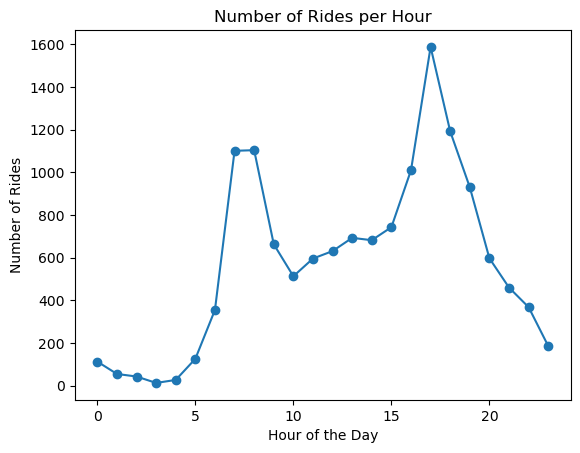

In [38]:
#Write your code here
import matplotlib.pyplot as plt
plt.plot(number_of_ride['hr_start'], number_of_ride['number_of_rides'], marker='o')
plt.title('Number of Rides per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')


Write a query to get the number of rides starting in each hour by plan.


In [40]:
#Write your code here
query = "SELECT hr_start, plan_id, COUNT(*) as number_of_rides FROM df GROUP BY hr_start, plan_id;"
number_of_ride= sqldf(query, locals())
print(number_of_ride)

    hr_start    plan_id  number_of_rides
0          0         Go               25
1          0  Intro_Pro               29
2          0      Other               27
3          0        Pro               32
4          1         Go               16
..       ...        ...              ...
91        22        Pro              163
92        23         Go               45
93        23  Intro_Pro               51
94        23      Other               29
95        23        Pro               61

[96 rows x 3 columns]


Write a query to find the average price of each ride that has an initial battery charge of more than 50$\%$ originating at every hour of the day. Compare this with rides where the initial charge was below 50$\%$. This helps answer the question: Are scooters with less charge, less valuable?

In [43]:
#Write your code here
query = "SELECT hr_start, avg(price) as average_price FROM df WHERE batt_perc >0.5 GROUP BY hr_start;"
avg_price_= sqldf(query, locals())
print(avg_price)

    hr_start  average_price
0          0       2.688312
1          1       2.971429
2          2       2.160000
3          3       2.285714
4          4       2.777778
5          5       2.413043
6          6       3.199203
7          7       3.021384
8          8       3.267516
9          9       3.941886
10        10       4.295775
11        11       4.721154
12        12       5.361354
13        13       4.708861
14        14       4.602564
15        15       4.145951
16        16       4.004711
17        17       3.769504
18        18       3.700625
19        19       3.116747
20        20       2.856771
21        21       2.570064
22        22       2.532520
23        23       2.700730


Compute how many people went over.